# Task 6, The Sparks Foundation Internship

## Prediciton Using Decision Tree Algorithm 

### Done by Hazem Ayman Mohamed Ismail

#### Import libraries and packages 

In [2]:
import numpy as np
import pandas as pd 
from torch.utils.data.sampler import SubsetRandomSampler
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
import os

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import make_scorer , recall_score , precision_score
from sklearn.model_selection import GridSearchCVR
# from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline
plt.style.use('ggplot')

#### Read CSV data

In [3]:
filename = 'Iris.csv'

directory = 'data'

file_directory = os.path.join(directory, filename)

dataframe = pd.read_csv(file_directory , index_col= 0)

plot_models = 1

In [4]:
data = dataframe.to_numpy()
columns = dataframe.columns
columns = list(columns)
columns

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
dataframe.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
dataframe.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### further exploration and visualization

<AxesSubplot:>

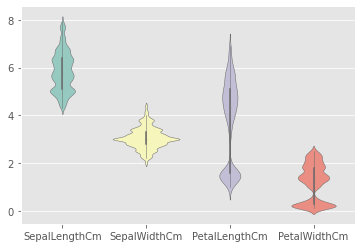

In [8]:
sns.violinplot(data=dataframe, palette="Set3", bw=.15, cut=2, linewidth=0.5)

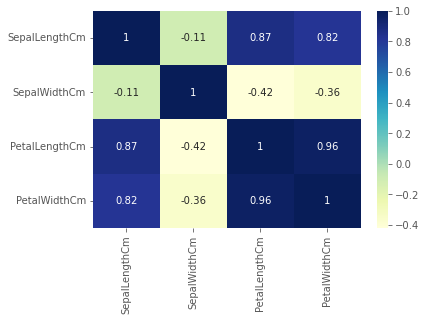

In [9]:
corr = dataframe.corr()
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)

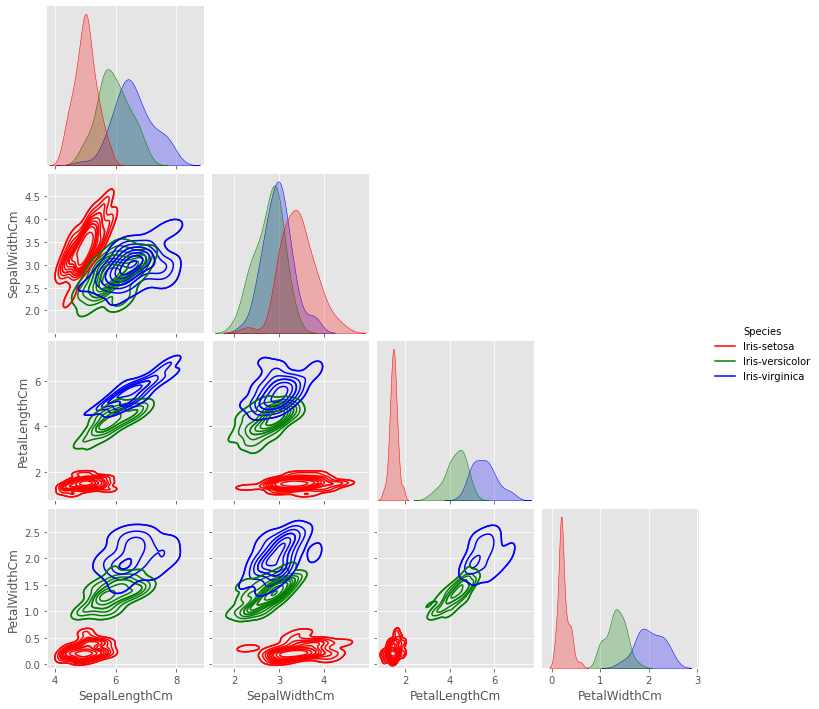

In [10]:
dataplot = sns.pairplot(dataframe,
                        hue="Species",
                       palette = ['red' , 'green' , 'blue'],
                       kind="kde",
                       corner = 'off')
dataplot.map_lower(sns.kdeplot, levels=4, color=".2")

<AxesSubplot:>

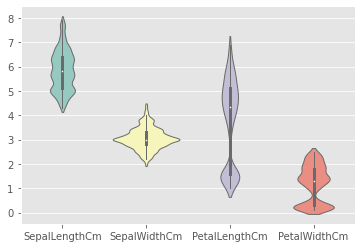

In [11]:
sns.violinplot(data=dataframe, palette="Set3", bw=.2, cut=1, linewidth=1)

Text(0.5, 1.0, 'PetalLengthCm')

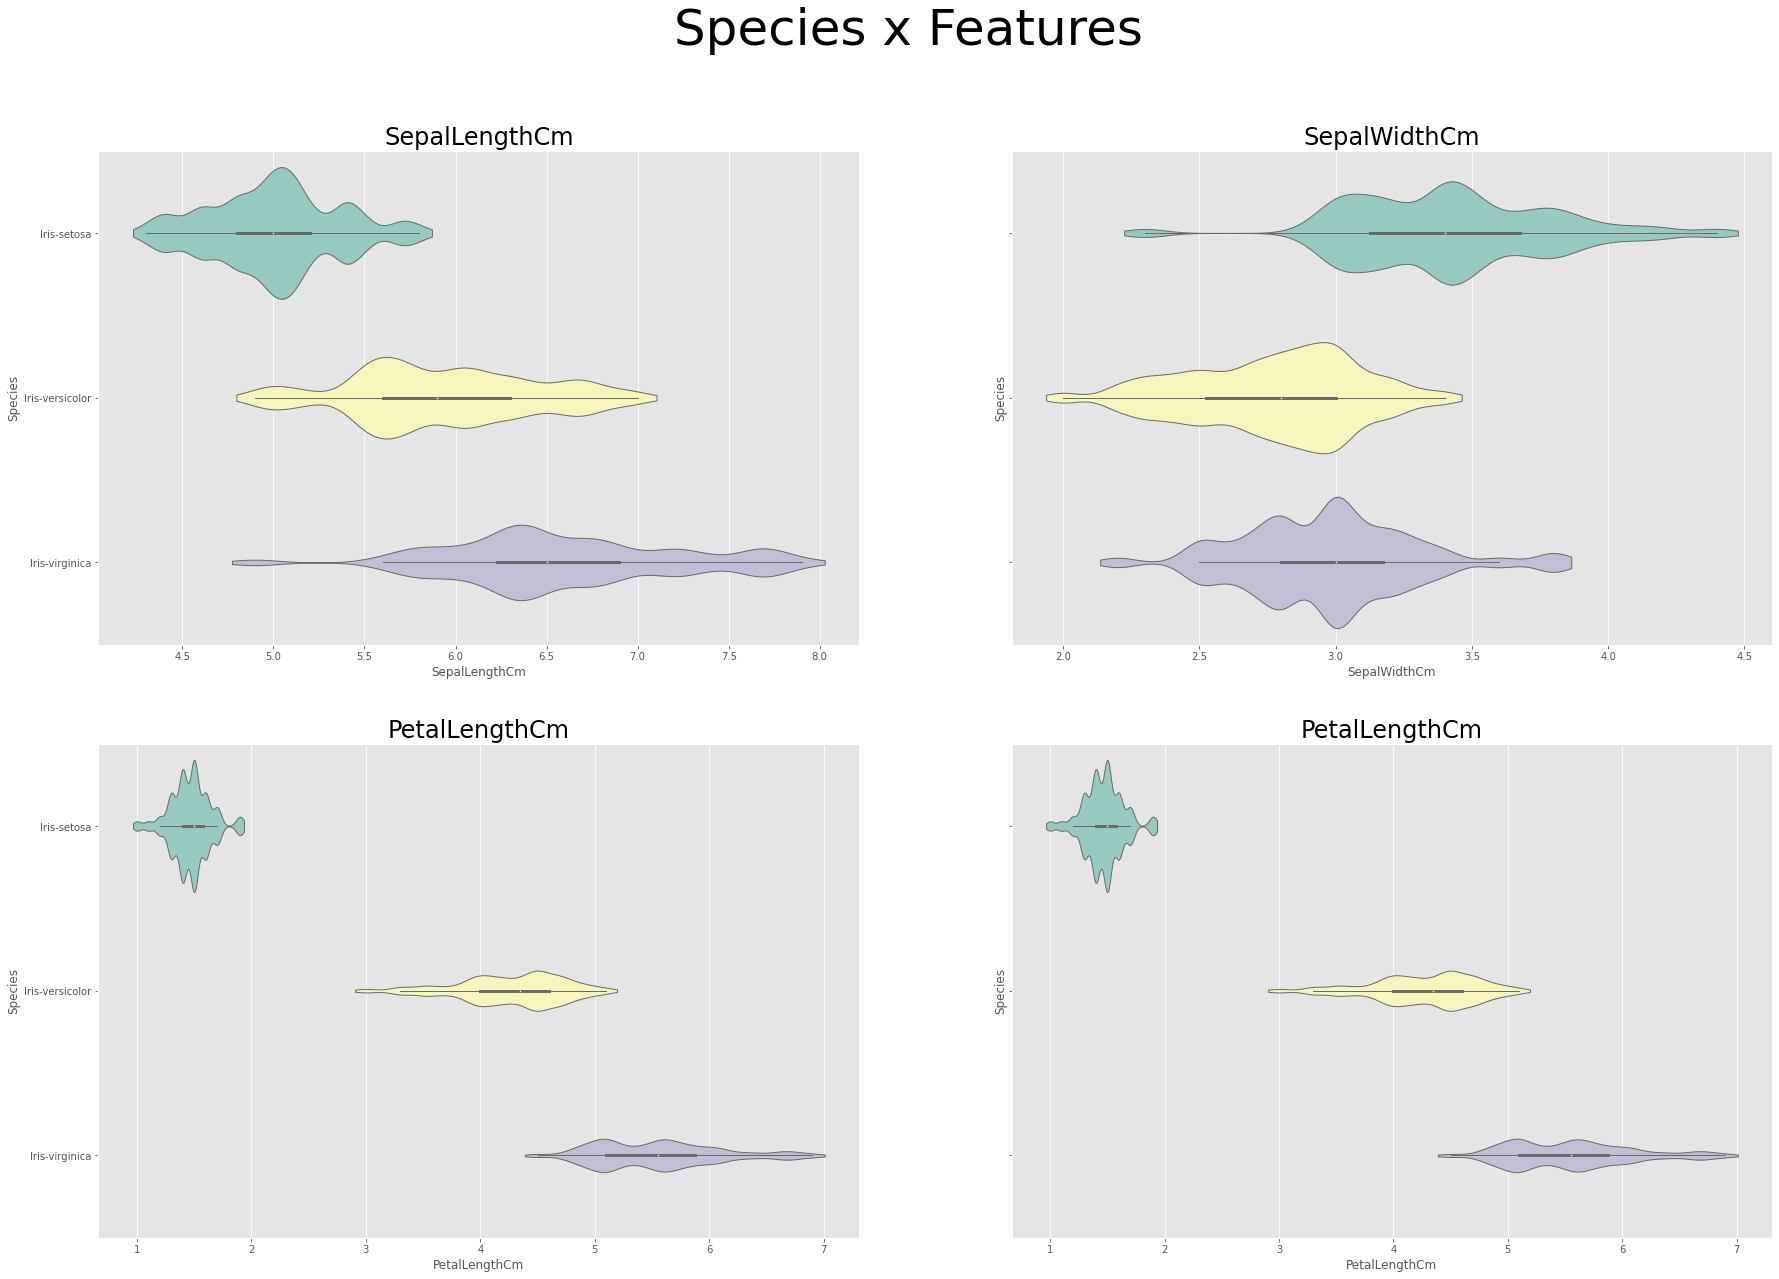

In [12]:
 
fig, axs = plt.subplots(2, 2 ,figsize = (30 , 20) , sharey=True )   
fig.suptitle('Species x Features',fontsize = 50)
g1 = sns.violinplot(ax = axs[0, 0], x='SepalLengthCm', y = 'Species', palette="Set3", bw=.2, cut=1, linewidth=1 , data = dataframe)
axs[0, 0].set_title('SepalLengthCm' ,fontsize = 24)
g2 = sns.violinplot(ax = axs[0, 1], x='SepalWidthCm' , y = 'Species', palette="Set3", bw=.2, cut=1, linewidth=1 , data = dataframe)
axs[0, 1].set_title('SepalWidthCm' ,fontsize = 24)
g3 = sns.violinplot(ax = axs[1, 0],x='PetalLengthCm' , y = 'Species', palette="Set3", bw=.2, cut=1, linewidth=1 , data = dataframe)
axs[1, 0].set_title('PetalLengthCm' ,fontsize = 24)
g4 = sns.violinplot(ax = axs[1, 1],x='PetalLengthCm' , y = 'Species', palette="Set3", bw=.2, cut=1, linewidth=1 , data = dataframe)
axs[1, 1].set_title('PetalLengthCm' ,fontsize = 24)

Create a Model Selection class which use the GridSearchCV function from sklearn.model_selection, to explore different model candidates and try to find the best using Kfold 

In [13]:
class ModelSelection:
    def __init__(self, model , model_parameters , viewResultOnFitting = False,cv = 20 , f1_score = False , cust_score = False):
        self.model = model
        self.model_parameters = model_parameters
        self.splits = cv
        self.viewResultOnFitting  = viewResultOnFitting
        self.best_model = None
        self.f1_score = f1_score
        class_0_recall_scorer = make_scorer(recall_score , pos_label = 0 , zero_division = 1)
        class_1_recall_scorer = make_scorer(recall_score , pos_label = 1 ,  zero_division = 1)
        class_0_percision_scorer = make_scorer(precision_score , pos_label = 0 ,  zero_division = 1)
        class_1_percision_scorer = make_scorer(precision_score , pos_label = 1 ,  zero_division = 1)
        self.cust_score = cust_score
        if(self.cust_score == True):
            self.clf = GridSearchCV(self.model , cv = self.splits , param_grid = self.model_parameters , scoring = {
            'class_0_recall' : class_0_recall_scorer,
            'class_1_recall' : class_1_recall_scorer,
            'class_0_percision' : class_0_percision_scorer,
            'class_1_percision' : class_1_percision_scorer,
            'accuracy_score' : accuracy_score,
            },refit = self.cstmScoring  , verbose = 1 + self.viewResultOnFitting)
        else:
            self.clf = GridSearchCV(self.model,
                                    cv = self.splits,
                                    param_grid = self.model_parameters, 
                                    verbose = 1 + self.viewResultOnFitting)

        self.mean_recall_0 = []
        self.mean_recall_1 = []
        self.mean_percision_0 = []
        self.mean_percision_1 = []
        self.mean_accuracy_score = []
    def fit(self, X_train , Y_train):
        self.clf.fit(X_train , Y_train)
    
    def plot_data(self):
        if(self.cust_score == True):
            fig, axs = plt.subplots(2)

            xmin, xmax = plt.xlim()

            fig.suptitle(f'Recall Precision For Candidate (BEST MODEL: {self.best_model})' , fontsize = 30 )
            axs[0].plot([i for i in range(self.mean_percision_0.shape[0])], self.mean_percision_0 , linewidth=1 , color='red')
            axs[0].plot([i for i in range(self.mean_recall_0.shape[0])], self.mean_recall_0 , linewidth=1 , color='blue')
            axs[0].set_title("class 0" ,  fontsize = 20 , color = 'green')
            axs[0].set_xlabel('Model Candidate' , fontsize = 15)
            axs[0].set_ylabel('Percentage' , fontsize = 15)
            axs[0].legend(["Precision", "Recall"] , fontsize = 15)

            axs[1].plot([i for i in range(self.mean_percision_1.shape[0])], self.mean_percision_1 , linewidth=1 , color='red')
            axs[1].plot([i for i in range(self.mean_recall_1.shape[0])], self.mean_recall_1 , linewidth=1 , color='blue')
            axs[1].set_title("class 1" ,  fontsize = 20 , color = 'green')
            axs[1].set_xlabel('Model Candidate' , fontsize = 15)
            axs[1].set_ylabel('Percentage' , fontsize = 15)
            axs[1].legend(["Precision", "Recall"] , fontsize = 15)

            plt.show()
        else:

            means = self.clf.cv_results_['mean_test_score']
           
            plt.figure(figsize=(15, 5))
            plt.plot([i for i in range(means.shape[0])], means , linewidth=1 , color='red')
            plt.title(f'BEST MODEL: {self.clf.best_estimator_} with score: {self.clf.best_score_}' ,fontsize = 30  )
# #             axs[0].set_title("class 0" ,  fontsize = 20 , color = 'green')
#             a.set_xlabel('Model Candidate' , fontsize = 15)
#             a.set_ylabel('Percentage' , fontsize = 15)
         
#             a.legend(["validation score"] , fontsize = 15)

        

    def get_model(self):
        return self.clf.best_estimator_
    def cstmScoring(self , values):
        i = 1
        recallMatrix_1 = np.array([values[f'split{0}_test_class_1_recall']])
        recallMatrix_0 = np.array([values[f'split{0}_test_class_0_recall']])
        percisionMatrix_1 = np.array([values[f'split{0}_test_class_1_percision']])
        percisionMatrix_0 = np.array([values[f'split{0}_test_class_0_percision']])
        while(True):
            if(f'split{i}_test_class_1_recall' in values):
                recallMatrix_1 = np.vstack([recallMatrix_1,values[f'split{i}_test_class_1_recall']])
                i += 1
            else:
                break
        for j in range(i):
            recallMatrix_0 = np.vstack([recallMatrix_0,values[f'split{j}_test_class_0_recall']])
            percisionMatrix_1 = np.vstack([percisionMatrix_1,values[f'split{j}_test_class_1_percision']])
            percisionMatrix_0 = np.vstack([percisionMatrix_0,values[f'split{j}_test_class_0_percision']])
            
        recallMatrix_1 = np.mean(recallMatrix_1, axis=0)
        recallMatrix_0 = np.mean(recallMatrix_0, axis=0)
        percisionMatrix_1 = np.mean(percisionMatrix_1, axis=0)
        percisionMatrix_0 = np.mean(percisionMatrix_0, axis=0)
        
        self.mean_recall_0 = recallMatrix_0
        self.mean_recall_1 = recallMatrix_1
        self.mean_percision_0 = percisionMatrix_0
        self.mean_percision_1 = percisionMatrix_1
        
        function_values_cstm = []
        if(self.viewResultOnFitting):
            print(recallMatrix_1)
            print(percisionMatrix_1)
        for j in range(percisionMatrix_0.shape[0]):
            if(self.f1_score):
                function_values_cstm.append((2 * recallMatrix_1[j] * percisionMatrix_1[j]) / (recallMatrix_1[j] + percisionMatrix_1[j])  )
            else:
                function_values_cstm.append(5 * recallMatrix_1[j] + percisionMatrix_1[j] - 1 * abs(recallMatrix_1[j] - percisionMatrix_1[j]))

        max_item = max(function_values_cstm)
        if(self.viewResultOnFitting):
            print(function_values_cstm.index(max_item))
            print(percisionMatrix_1[function_values_cstm.index(max_item)] , recallMatrix_1[function_values_cstm.index(max_item)])
        self.best_model = function_values_cstm.index(max_item)
        return self.best_model
    


Split the data into train and test data with 20% test size, using stratify on the Species to have the same percentages of classes in both the train and test sets 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data[:,:4], data[: , 4], test_size=0.23, random_state=13 , stratify = data[: , 4])

#### Model selection, fitting, and testing

here we use the modelSelection class to fit different combination of hyperparameters , each combination called a candidate, here we ft 3042 different candidates using k of 20 in the Kfold for cross validation, I choose **max_depth**,**min_samples_leaf**, **min_samples_split**,**splitter** , **max_features**, as different types of hyperparameters 

Fitting 20 folds for each of 756 candidates, totalling 15120 fits


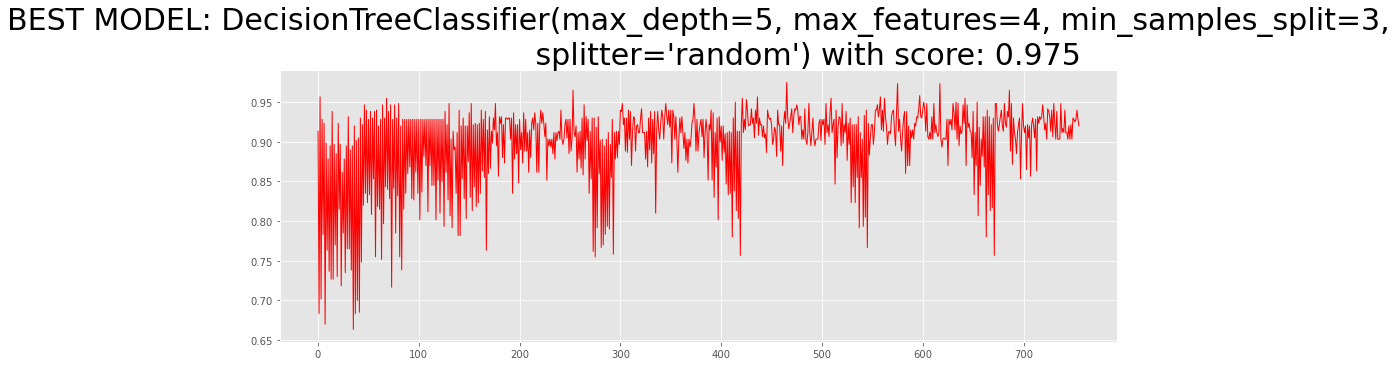

In [28]:
# myBayesClassifier.fit(X_new_train , y_train)
clf = tree.DecisionTreeClassifier()
max_depth = [k for k in range(2 , 8)]
min_samples_split = [k for k in range(2 , 5)]
min_samples_leaf = [k for k in range(1 , 8)]
modelselection = ModelSelection(clf, model_parameters = {'max_depth' : max_depth , 
                                                        'min_samples_leaf' : min_samples_leaf,
                                                        'min_samples_split' : min_samples_split,
                                                         'max_features': [2, 3, 4],
                                                        'splitter' : ['best' , 'random']} 
                                , viewResultOnFitting = False , f1_score = False)
modelselection.fit(X_train , y_train)

modelselection.plot_data()


In [29]:
clf = modelselection.get_model()
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
y_pred = y_pred.reshape(-1,)


# Look at classification report to evaluate the model
print('--------------------------------------------------------')
score = accuracy_score(y_test, y_pred , normalize = True)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, y_pred))

--------------------------------------------------------
Accuracy Score:  0.9714285714285714
--------------------------------------------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        35
      macro avg       0.97      0.97      0.97        35
   weighted avg       0.97      0.97      0.97        35



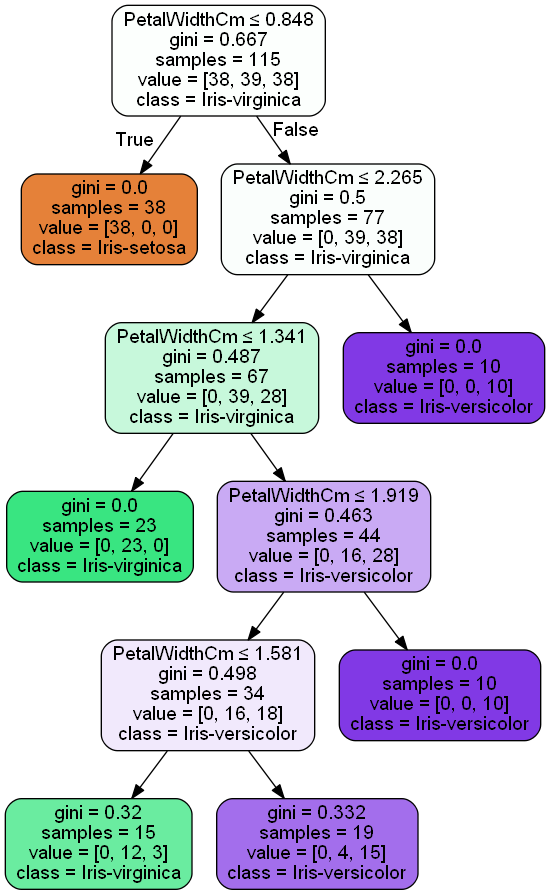

In [30]:
dot_data = StringIO()
export_graphviz(clf , out_file = dot_data , rounded = True  , filled = True , special_characters = True, feature_names = columns[:4], class_names = ['Iris-setosa', 'Iris-virginica','Iris-versicolor'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Iris.png")
Image(graph.create_png())